In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
# import xbpch
from scipy import stats
import random

In [2]:
d34Santh_data = pd.read_excel('./Data/d34Sa_histogram_download.xlsx')
d34Santh_data

,Fossil Type,Identifier,Authors and year,Sulfur,Material,Location,Country,Latitude,Longitude,d34Sv (permille),Notes
0,O,O1000,Hitchcock and Black 1984,BulkS,"Sulfur from crude oil, coal, and residual oil",United States,United States,NaN,NaN,-9.0,Note: O1000 through O1056 have identifiers out...
1,O,O1001,Hitchcock and Black 1984,BulkS,"Sulfur from crude oil, coal, and residual oil",United States,United States,NaN,NaN,-9.0,NaN
2,O,O1002,Hitchcock and Black 1984,BulkS,"Sulfur from crude oil, coal, and residual oil",United States,United States,NaN,NaN,-7.0,NaN
3,O,O1003,Hitchcock and Black 1984,BulkS,"Sulfur from crude oil, coal, and residual oil",United States,United States,NaN,NaN,-7.0,NaN
4,O,O1004,Hitchcock and Black 1984,BulkS,"Sulfur from crude oil, coal, and residual oil",United States,United States,NaN,NaN,-7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1963,O,O2139,Nielsen 1991,BulkS,oil from cretaceous rocks in siberia,Russia,Russia,Russia,Russia,2.8,"Ust-Balykskoe, 63"
1964,O,O2140,Nielsen 1991,BulkS,cenozoic oils,Russia,Russia,NaN,NaN,-11.0,Tadzhik depression
1965,O,O2141,Nielsen 1991,BulkS,cenozoic oils,Russia,Russia,NaN,NaN,-4.5,Fergana depression
1966,O,O2142,Nielsen 1991,BulkS,cenozoic oils,Russia,Russia,NaN,NaN,-1.2,Sub-Caucasus


In [3]:
d34Santh_by_id = (d34Santh_data.groupby('Identifier')['d34Sv (permille)']).mean()
d34Santh_byS = (d34Santh_data.groupby('Sulfur')['d34Sv (permille)']).mean()
d34Santh_by_Author = (d34Santh_data.groupby('Authors and year')['d34Sv (permille)']).mean()
d34Santh_by_country = (d34Santh_data.groupby('Country')['d34Sv (permille)']).mean()
len(d34Santh_by_Author)

70

In [4]:
print(np.round(np.min(d34Santh_by_id),2))
print(np.round(np.max(d34Santh_by_id),2))
print(np.round(np.mean(d34Santh_by_id),2))
print(np.round(np.std(d34Santh_by_id),2))

-35.12
33.0
3.39
9.58


In [5]:
d34Santh_coal = (d34Santh_data.loc[d34Santh_data['Fossil Type']=='C'].groupby('Identifier')['d34Sv (permille)']).mean()
d34Santh_oil = (d34Santh_data.loc[d34Santh_data['Fossil Type']=='O'].groupby('Identifier')['d34Sv (permille)']).mean()

In [6]:
d34Sa_byloc_id = (d34Santh_data.groupby(['Identifier','Location'])).min().groupby(level=1).min()
x = d34Sa_byloc_id['Country']
x = d34Santh_by_Author
for i in range(0,len(x)):
    print(x.index[i])#np.round(x.values[i],1))

Amrani 2012
Amrani 2019
Bottrell 1994
Cai 2005
Cai 2009
Cai 2015
Cai 2016
Chen 2017
Chmielewski 2002
Collister 1992
Dai 2002
Derda 2007
Eastoe and Artiola 2003
Ellis 2017
Elswick 2007
Engel 2007
Erarslan 2020
Gaffney 1979
Goncharov 1987
Greenwood 2018
Grotheer 2017
Gvirtzman 2015
Hackley and Anderson 1986
He 2013
He 2019
Heydari 1989
Hirner and Robinson 1989
Hitchcock and Black 1984
Holmes and Brownfield 1992
Hong 1993
Jiang 2008
Kesler 1994
Li 2015
Li and Tang 2014
Liu 1987
Liu 2016
Magoon and Claypool 1981
Manzano 1997
Maruyama 2000
Mehay 2009
Motoyama 2000
Newman 1975
Nielsen 1991
Nielson 1991
Ohizumi 1997
Orr 1974
Orr 2001
Pankina and Mekhtiyeva 1964
Premuzic 1986
Price and Shieh 1979
Robinson 1991
Rosenberg 2017
Shimoyama 1990
Siedenberg 2018
Smith 1982
Smith and Batts 1974
Spiker 1994
Thode 1981
Thode and Monster 1958
Thompson 1990
Vredenburgh 1971
Wei 2012
Westgate and Anderson 1982
Westgate and Anderson 1984
Whelan 1988
Xiao 2011
Zhao 2003
Zhu 2007
Zhu 2018a
Zhu 2018b


/tmp/ipykernel_30219/4023373862.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  d34Sa_byloc_id = (d34Santh_data.groupby(['Identifier','Location'])).min().groupby(level=1).min()


3.392249041756041
9.582927999491336


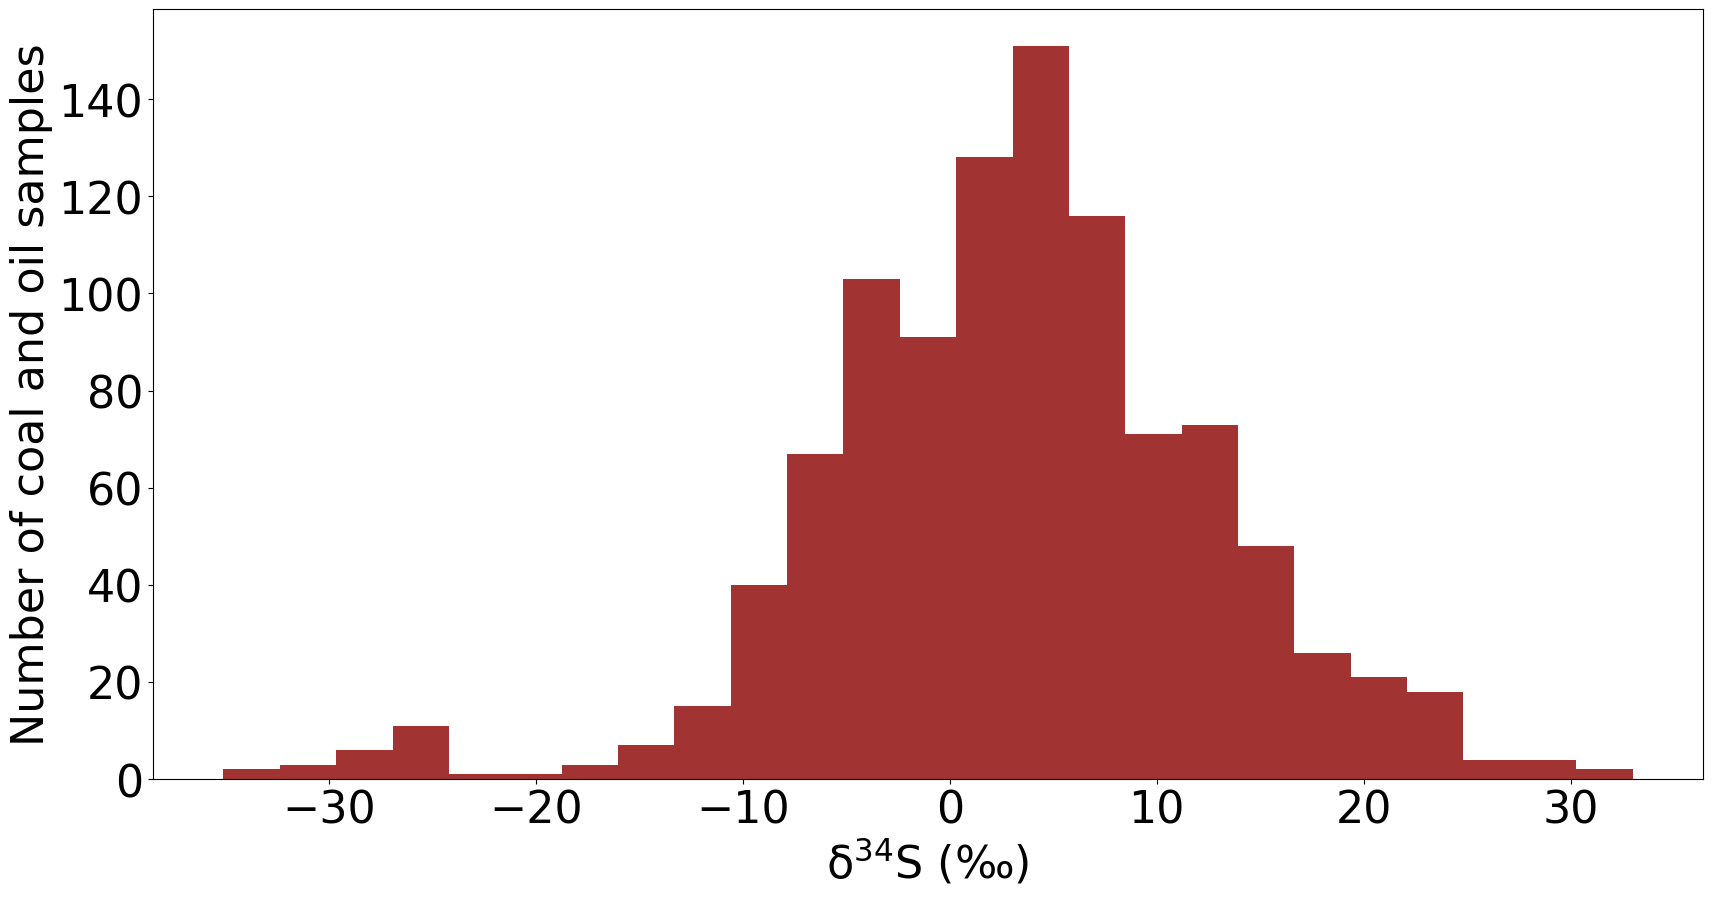

In [7]:
fig, ax = plt.subplots(figsize=[20,10])

ax.hist(d34Santh_by_id,color='darkred',bins=25,label='coal and oil δ$^{34}$S', alpha=0.8)
j=32

ax.tick_params(labelsize=j)
ax.set_ylabel('Number of coal and oil samples',fontsize=j)
ax.set_xlabel('δ$^{34}$S (‰)',fontsize=j)
# ax.legend(loc='upper right',fontsize=j-2)

print(np.mean(d34Santh_by_id))
print(np.std(d34Santh_by_id))

mean 3.7193789107453723
std 9.738112741272923


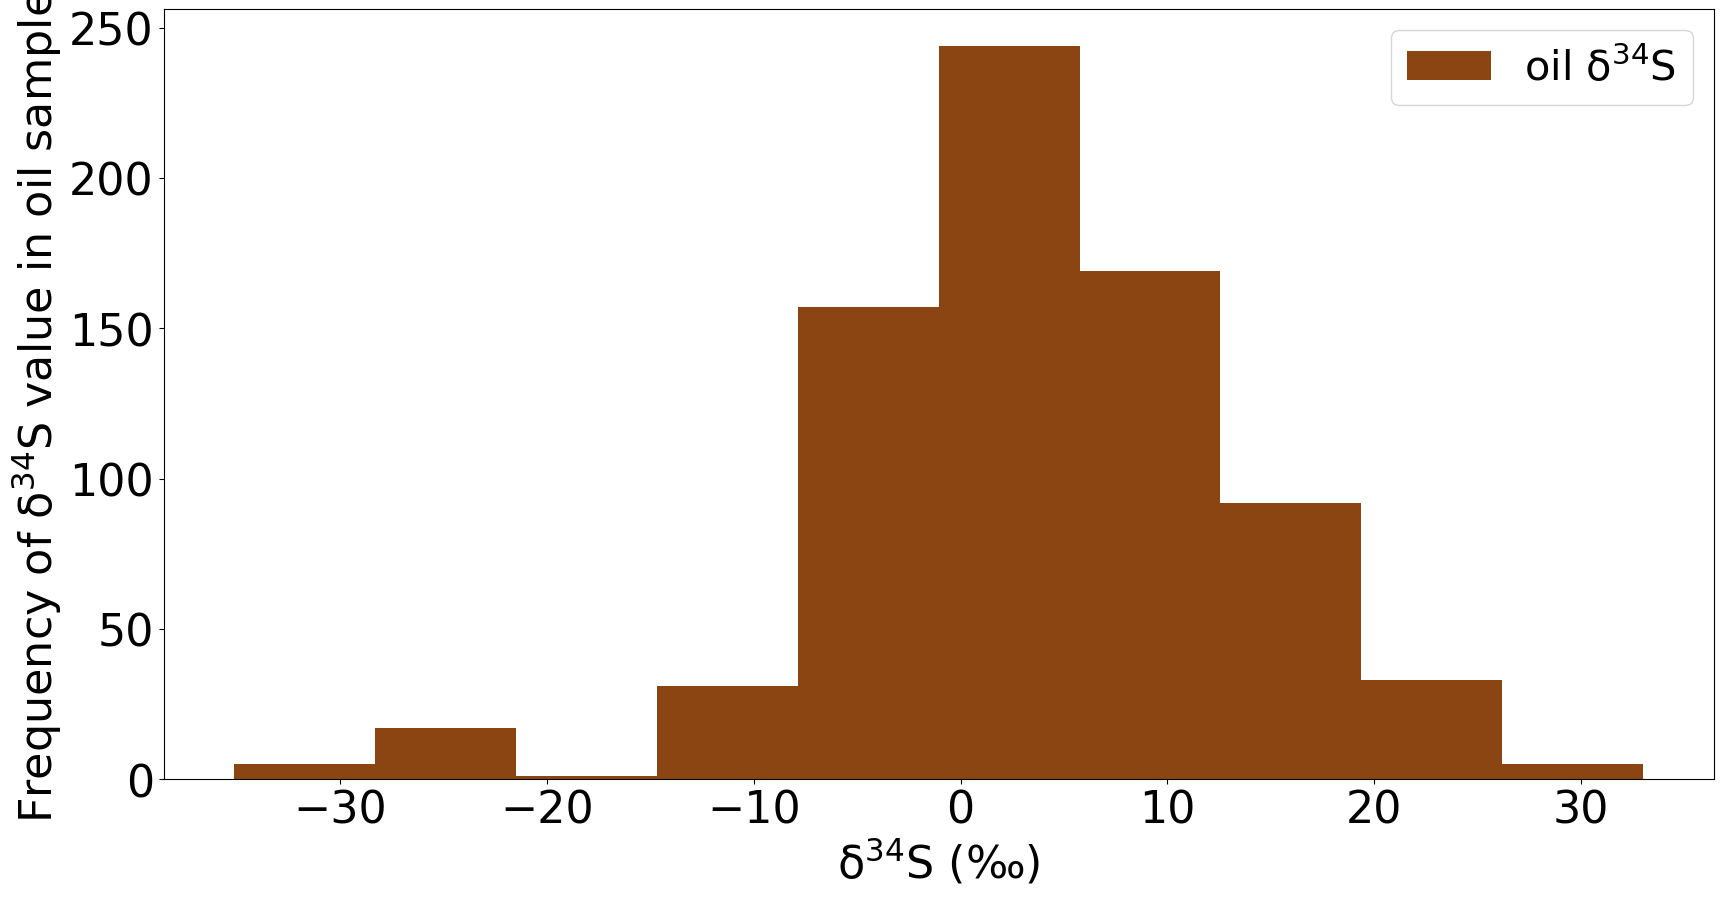

In [8]:
fig, ax = plt.subplots(figsize=[20,10])

ax.hist(d34Santh_oil,color='saddlebrown',label='oil δ$^{34}$S')
j=32

ax.tick_params(labelsize=j)
ax.set_ylabel('Frequency of δ$^{34}$S value in oil samples',fontsize=j)
ax.set_xlabel('δ$^{34}$S (‰)',fontsize=j)
ax.legend(loc='upper right',fontsize=j-2)

print('mean',np.mean(d34Santh_oil))
print('std',np.std(d34Santh_oil))

mean 2.4362183393608623
std 9.046723424755536


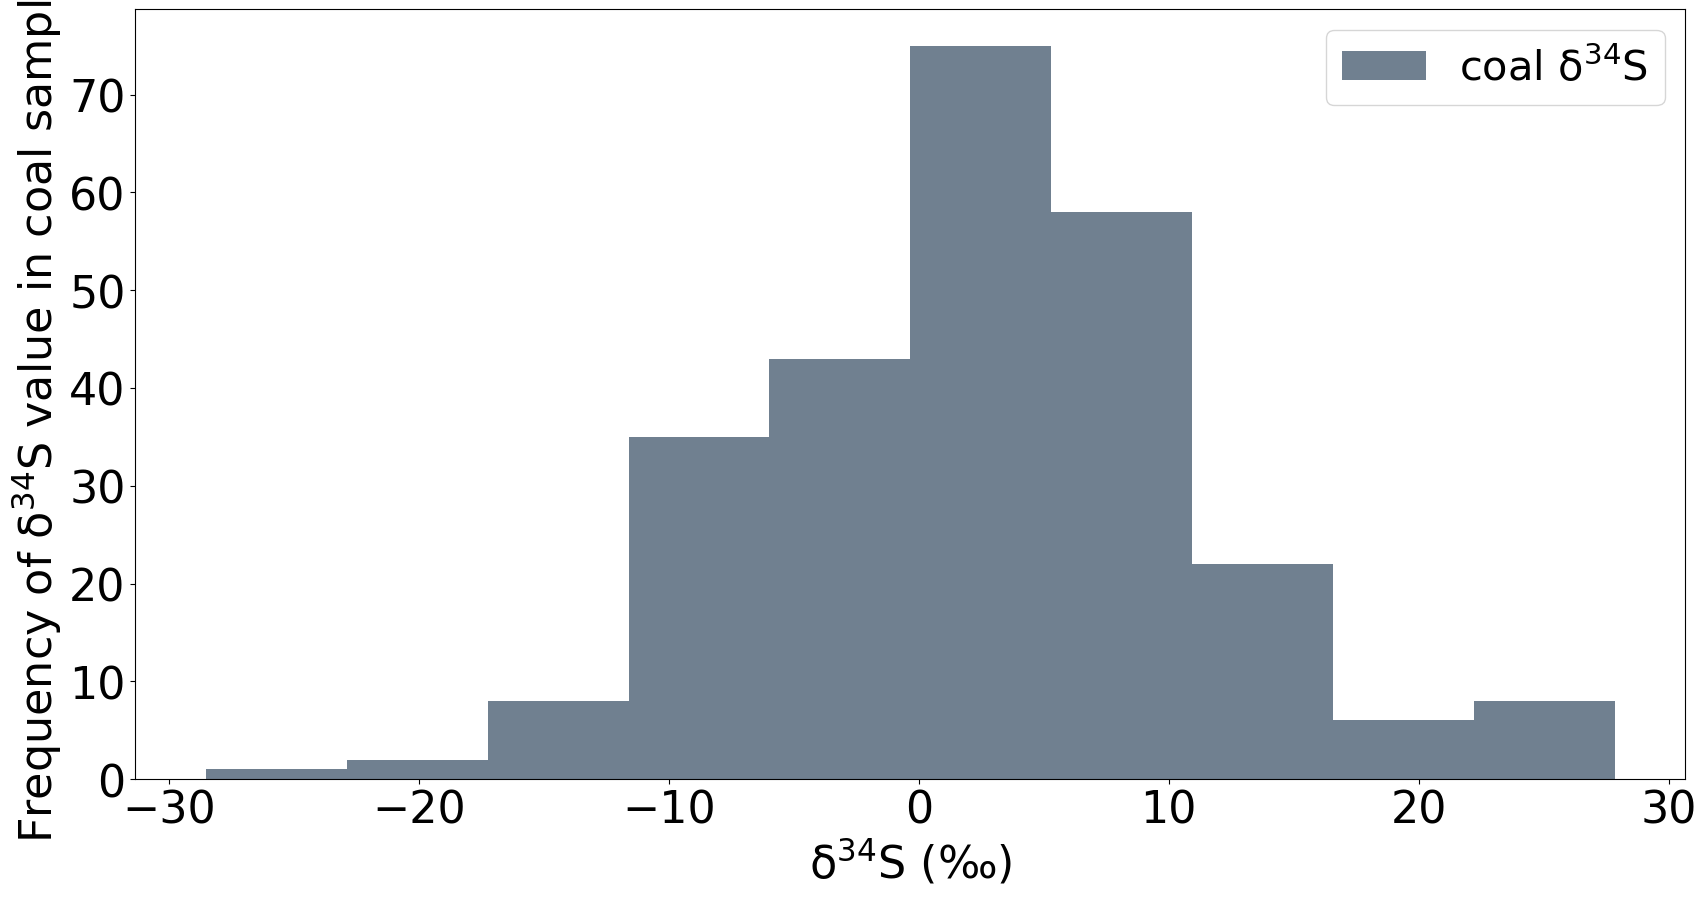

In [9]:
fig, ax = plt.subplots(figsize=[20,10])

ax.hist(d34Santh_coal,color='slategray',label='coal δ$^{34}$S')
j=32

ax.tick_params(labelsize=j)
ax.set_ylabel('Frequency of δ$^{34}$S value in coal samples',fontsize=j)
ax.set_xlabel('δ$^{34}$S (‰)',fontsize=j)
ax.legend(loc='upper right',fontsize=j-2)

print('mean',np.mean(d34Santh_coal))
print('std',np.std(d34Santh_coal))

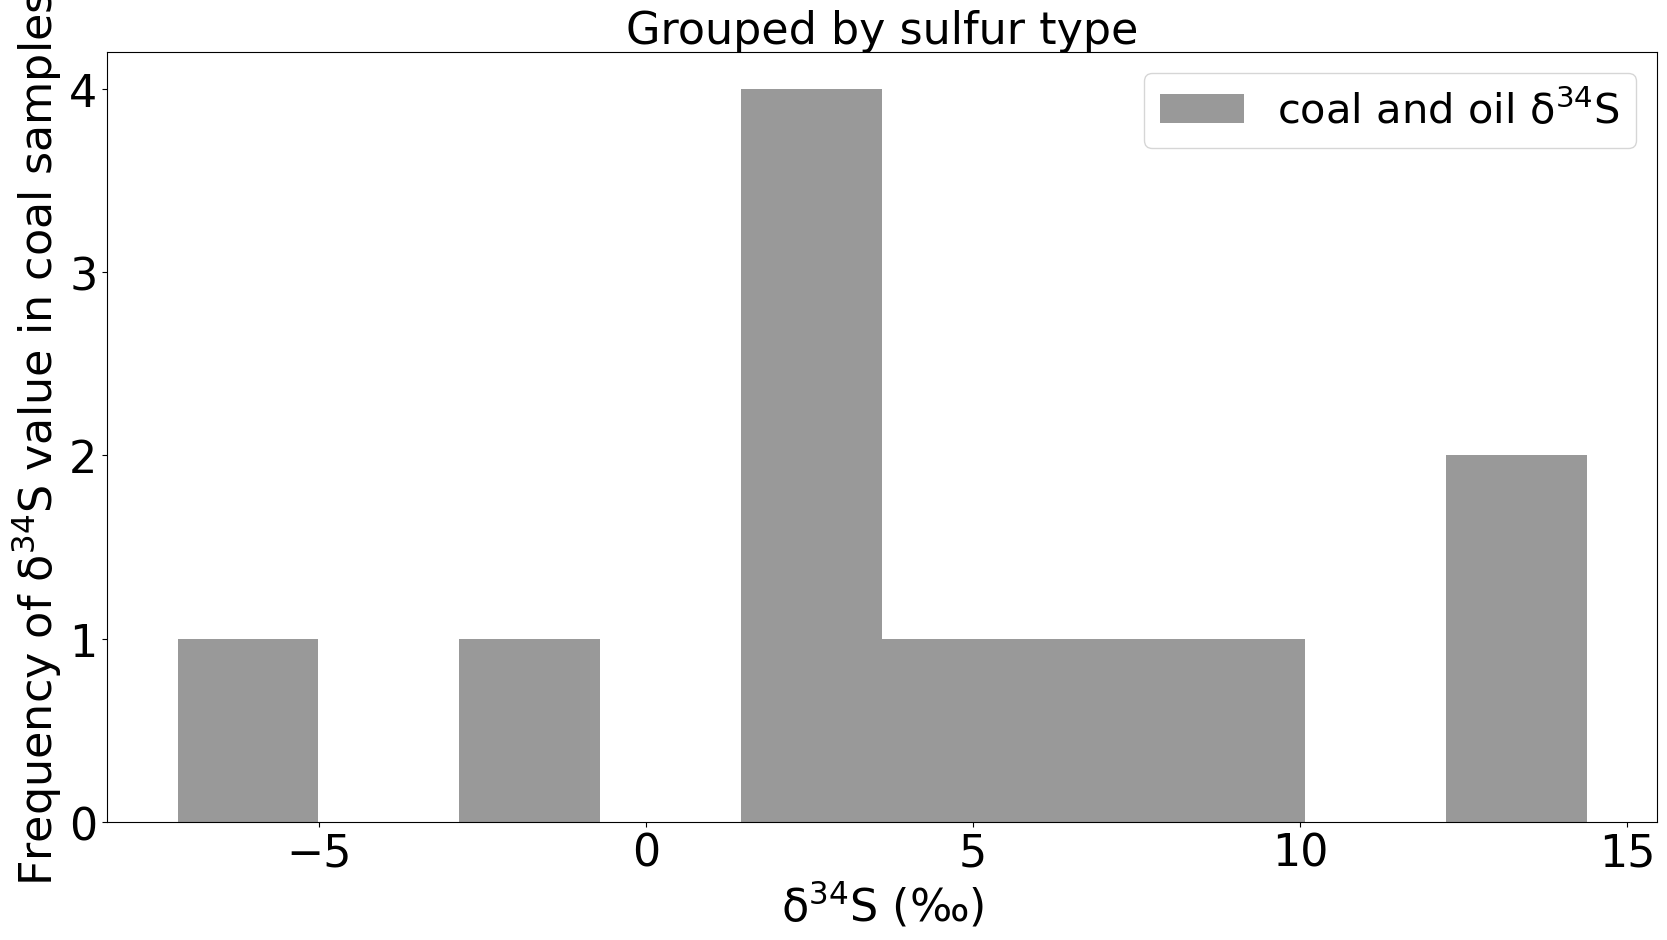

In [10]:
fig, ax = plt.subplots(figsize=[20,10])

ax.hist(d34Santh_byS,color='gray',label='coal and oil δ$^{34}$S',alpha=0.8)
j=32

ax.tick_params(labelsize=j)
ax.set_title('Grouped by sulfur type',fontsize=j)
ax.set_ylabel('Frequency of δ$^{34}$S value in coal samples',fontsize=j)
ax.set_xlabel('δ$^{34}$S (‰)',fontsize=j)
ax.legend(loc='upper right',fontsize=j-2)

In [11]:
d34Santh_byS

Sulfur
Ash S              14.383400
BulkS               3.074967
Flue gas sludge     4.042857
Flume gas SO2       2.836364
H2S                 9.714318
OrgS                2.349857
PyriteS             3.343759
S                   6.806667
SO2                -2.717647
SO4                12.348980
Sphalerite         -7.170588
Name: d34Sv (permille), dtype: float64

In [12]:
print(len(d34Santh_data))
print(len(d34Santh_by_id))
print(len(d34Santh_coal))
print(len(d34Santh_oil))

1968
1012
258
754


In [13]:
n=10000
d34Sa_sample = d34Santh_by_id
x = len(d34Santh_by_id)
d34Sa_boot = np.zeros(n)
for i in range(0,n):
    randomList_d34Sa = [random.randint(0,x-1) for j in range(x-1)]
    d34Sa_boot[i] = np.mean(d34Sa_sample[randomList_d34Sa])

In [14]:
np.mean(d34Sa_boot)

3.3894275617858525

In [15]:
np.std(d34Sa_boot)

0.29898106438792305

N:      1012
Mean d34Sa:   3.39
Median d34Sa: 3.39
Std d34Sa:    0.3
Min d34Sa:    2.3
Max d34Sa:    4.71
N:            10000


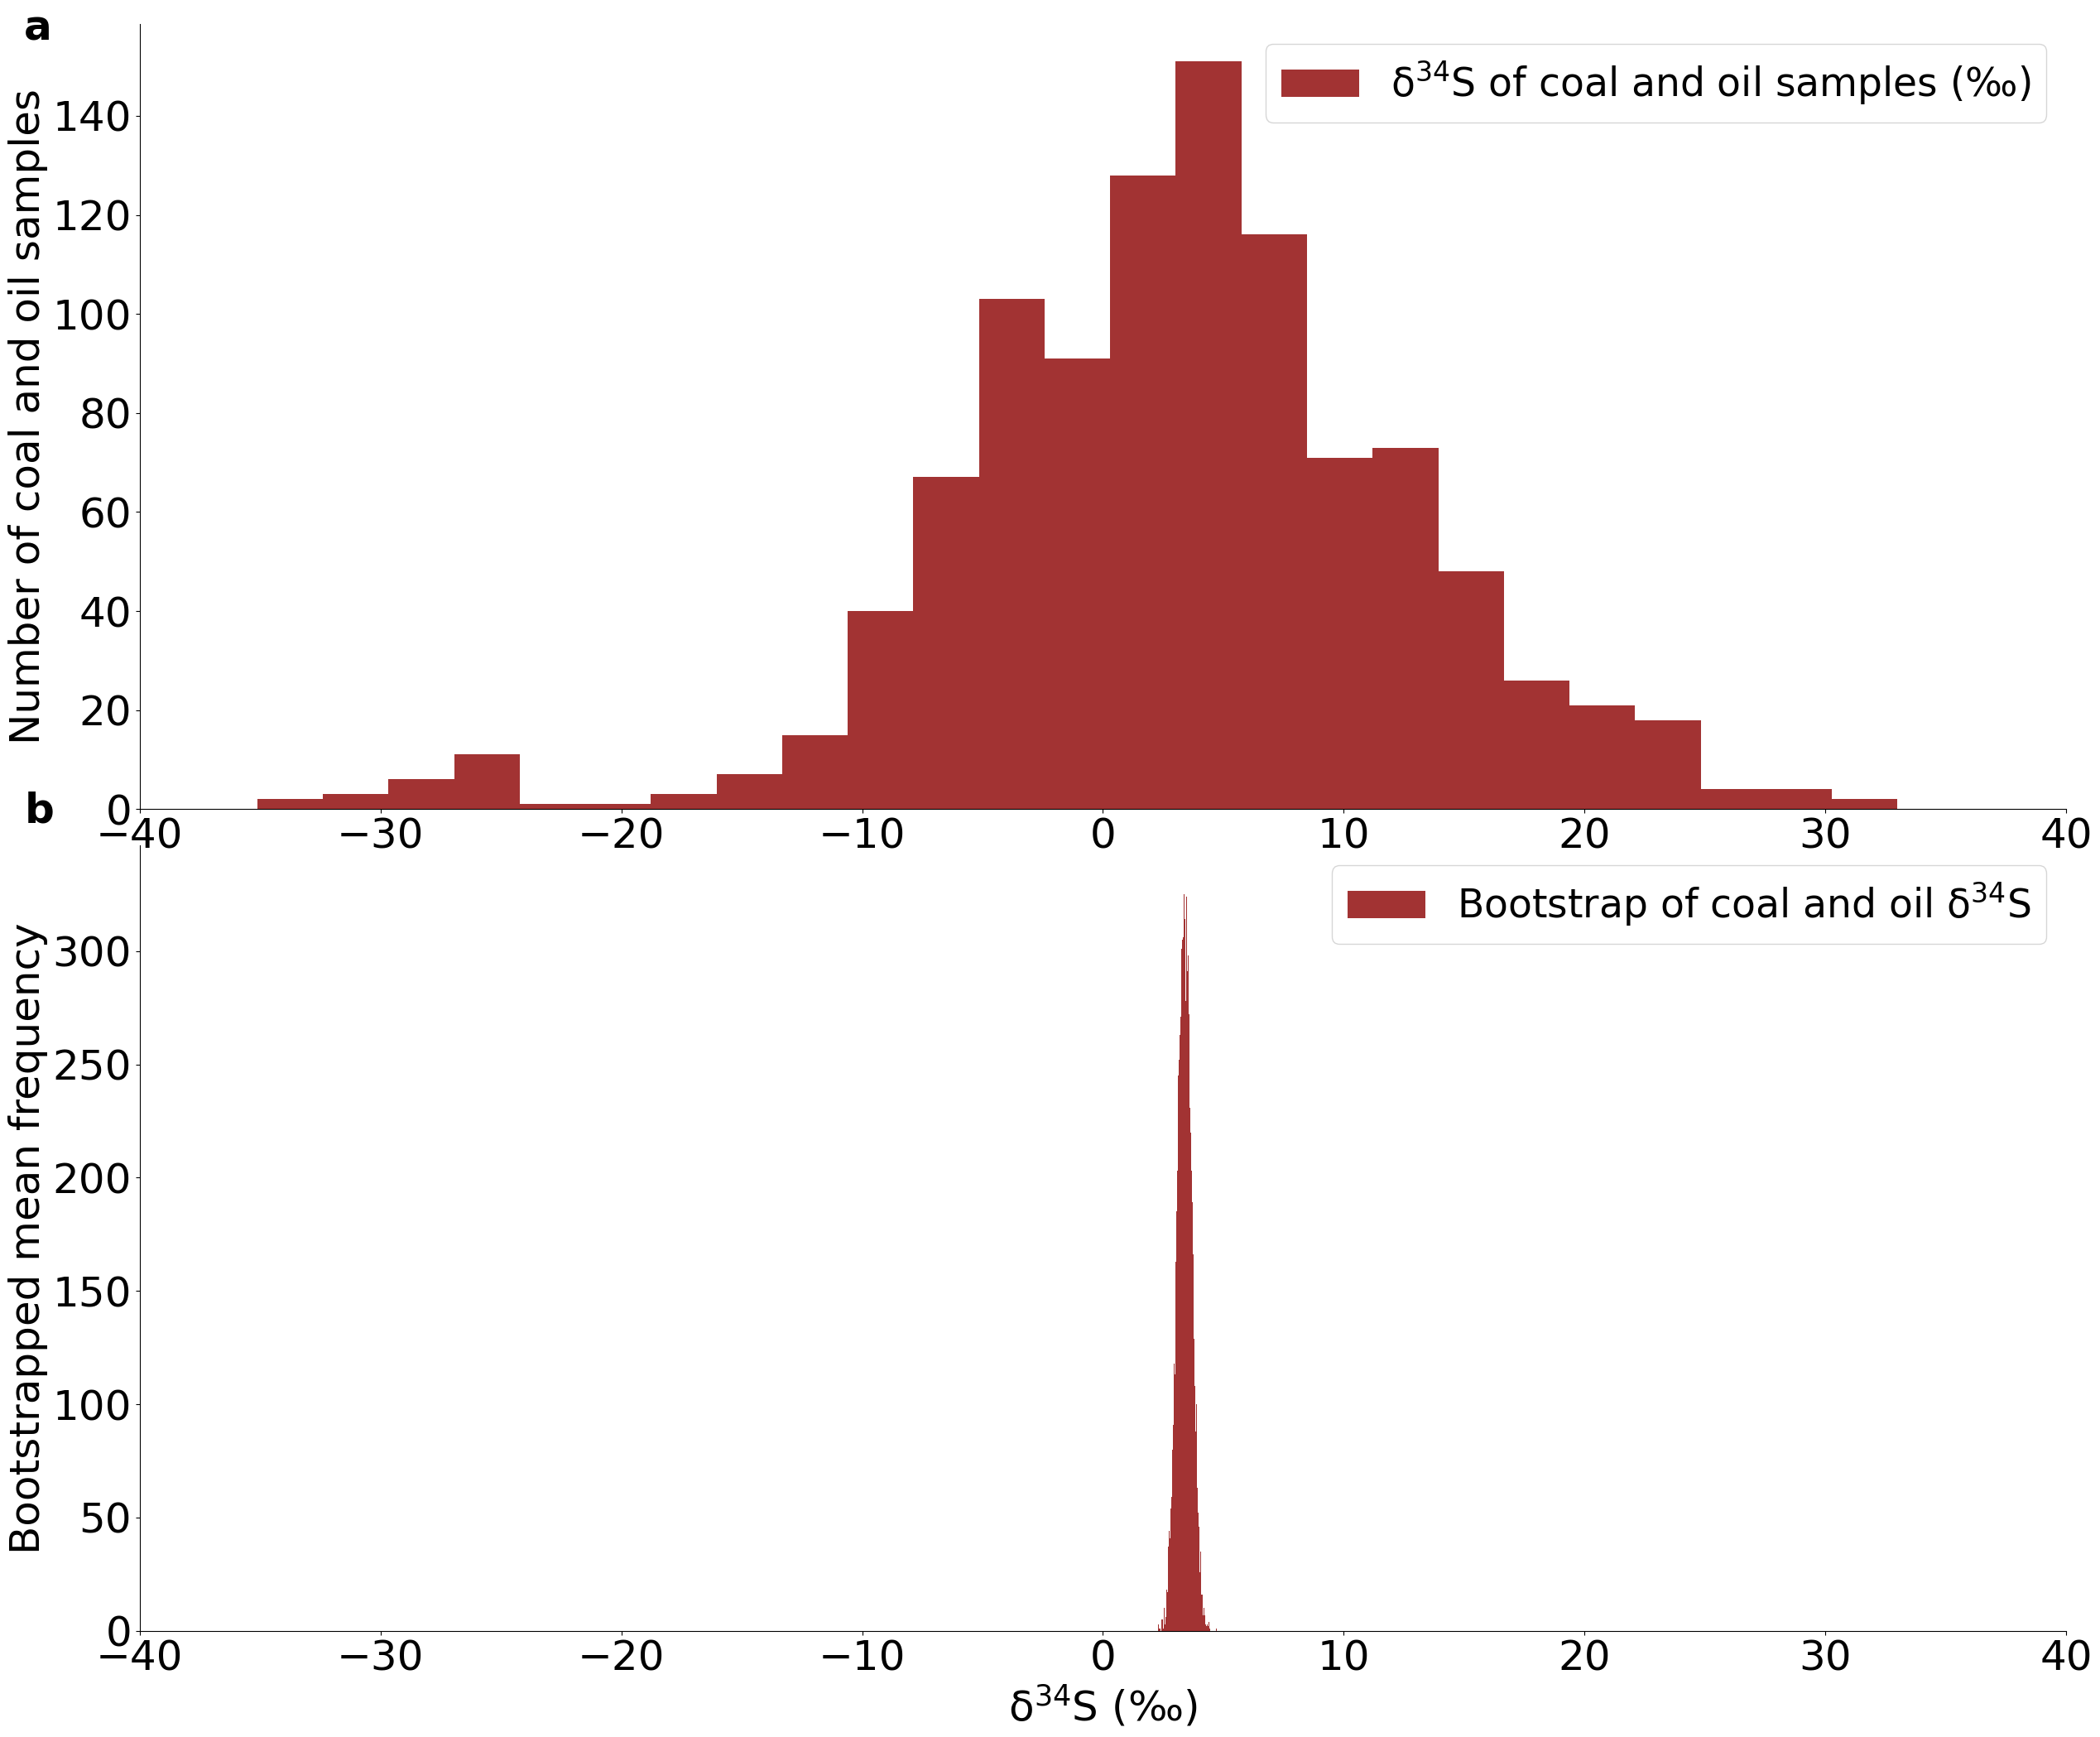

In [16]:
fig,ax = plt.subplots(nrows=2,figsize=[24,20])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=5)
plt.tight_layout()
j=36
x = d34Santh_by_id

for i in range(0,2,1):
    ax[i].patch.set_facecolor('white')
    ax[i].patch.set_alpha(0)

ax[0].hist(x, bins=25,color='darkred',alpha=0.8,label='δ$^{34}$S of coal and oil samples (‰)')
ax[0].set_ylabel('Number of coal sources',fontsize=j)
# ax[0].set_ylim([0,8])
ax[0].set_xlim([-12,24])

print('N:     ',len(x))
ax[0].set_ylabel('Number of coal and oil samples',fontsize=j)
# ax[0].set_ylim([0,60])
ax[0].set_xlim([-40,40])
# ax[0].axes.get_xaxis().set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend(loc='upper right',fontsize=j-2)

ax[1].hist(d34Sa_boot, bins=100,color='darkred',alpha=0.8,label='Bootstrap of coal and oil δ$^{34}$S')
ax[1].set_xlim([-40,40])
ax[1].set_ylabel('Bootstrapped mean frequency',fontsize=j)
ax[1].set_xlabel('δ$^{34}$S (‰)',fontsize=j)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend(loc='upper right',fontsize=j-2)

ax[0].tick_params(labelsize= j)
ax[1].tick_params(labelsize= j)
ax[0].tick_params(labelsize= j)
ax[1].tick_params(labelsize= j)

ax[0].text(-0.06, 1.02, 'a', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(-0.06, 1.07, 'b', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')


print('Mean d34Sa:  ',np.round(np.mean(d34Sa_boot),2))
print('Median d34Sa:',round(np.median(d34Sa_boot),2))
print('Std d34Sa:   ',round(np.std(d34Sa_boot),2))
print('Min d34Sa:   ',round(np.min(d34Sa_boot),2))
print('Max d34Sa:   ',round(np.max(d34Sa_boot),2))
print('N:           ',len(d34Sa_boot))
